### Discussion EDS 232: 01/16/2025
#### Madison Enda


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

In [4]:
# Split the data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


ridge_model= Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions= ridge_model.predict(X_test)

ridge_rmse= np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2= r2_score(y_test, ridge_predictions)

print(ridge_rmse)
print(ridge_r2)

0.14410020171824975
0.9984722762470865


In [ ]:
# Create and fit Lasso regression model



### Coefficient Bar Plot


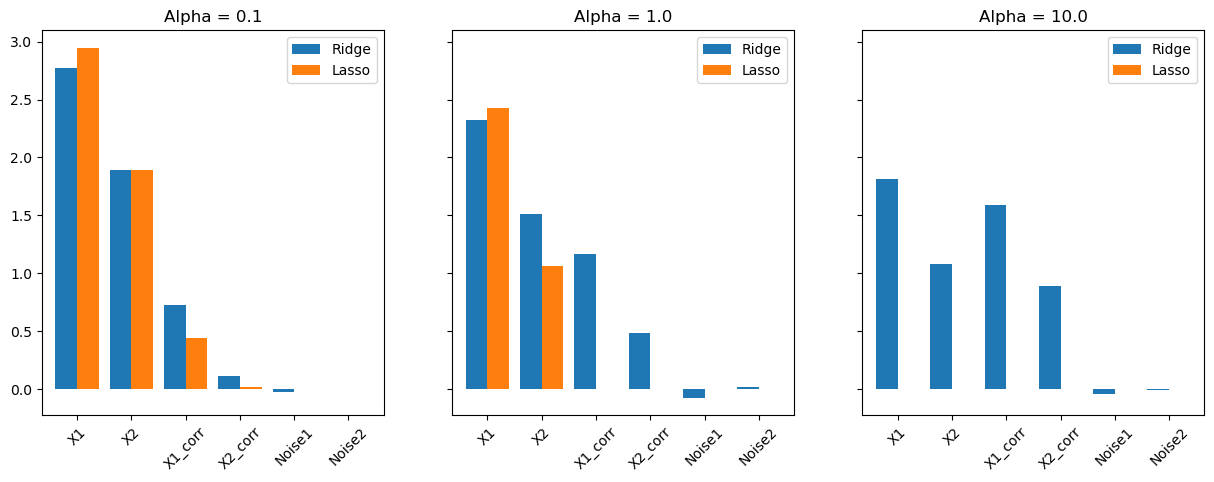

In [14]:
alphas= [0.1, 1.0, 10.0]
data=[]

for alpha in alphas:
    ridge= Ridge(alpha=alpha).fit(X,y)
    lasso= Lasso(alpha=alpha).fit(X,y)
    data.append(pd.DataFrame({
        'Ridge':ridge.coef_,
        'Lasso':lasso.coef_
    }, index= ['X1', 'X2', 'X1_corr', 'X2_corr', 'Noise1', 'Noise2']))
    
fig,axes= plt.subplots(1,3, figsize= (15,5), sharey= True)

for i,df in enumerate(data):
    df.plot.bar(ax= axes[i], width = 0.8)
    axes[i].set_title(f'Alpha = {alphas[i]}')
    axes[i].set_xticklabels((df.index), rotation = 45)